# TRENDS IN MATERNAL DEATH IN KENYA

### ABSTRACT
Maternal death refers to the death of a woman while pregnant or within 42 days of termination of pregnancy, irrespective of the duration and site of the pregnancy, from any cause related to or aggravated by the pregnancy or its management but not from accidental or incidental causes. This paper highlights maternal death trends in Kenya since the year 2000 to 2017 and highlights Nakuru as county with a high burden of maternal deaths.

### Introduction
In Kenya, maternal deaths are curretly high at 488 maternal deaths per 100,000.While this is below the sub-saharan average of 640 Kenya is experiencing a very slow progression in maternal health. Most of the causes of maternal deaths include but are not limited to
- Complications from unsafe abortions
- Obstretic comlications such as severe bleeding.
- Infections
- Hypertensive disorders
- Obstructed labor
- Some diseases are also aggravated by pregnancy such as malaris,diabetes,hepatitis and anaemia

These conditions are worsened by;
- Poor health infrastructure
- Low rates of skilled birth attendance
- Low access to family planning services and high rates of adolescent pregnancy.

For many women in Kenya, their husbands act as gate-keepers in accessing  healthcare services. It is mostly men who decide where a woman will give birth and if she will be attending clinics especially in Rural areas.This is due to the socio-economic challenges women face which makes them lack decision-making power in households.It is therefore paramount that for these interventions men be included

#### High Burden Maternal Death Counties
15 of Kenyas 47 counties lead in maternal deaths and they are:-
Garissa,Homabay,Isiolo,Kakamega,Kisumu,Lamu,Mandera,Marsabit, Migori,Nairobi,Nakuru,Siaya,Taita-taveta,Turkana and Wajir
<br>The North Eastern counties experience high maternal deaths due to their practises of child marriage and FGM. The most common cause of death for girls aged 15-19 in these regions is maternal death.</br>
<br>Below lets look at Data depicting Maternal death trends since the year 2000-2017 and see if we can predict future trends based on the data we have</br>

### TOTAL NUMBER OF MATERNAL DEATHS IN KENYA


In [4]:
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

In [6]:
import pandas as pd

In [7]:
#Loading the dataset containing maternal deaths in Kenya
MaternalDeaths= pd.read_csv('API_SH.MMR.DTHS_DS2_en_excel_v2_3161082.csv')

In [8]:
#preview of the data set
MaternalDeaths.head()

,Year,Number of maternal deaths
0,2000,9100
1,2001,9200
2,2002,9200
3,2003,9200
4,2004,9100


In [185]:
MaternalDeaths.tail()

,Year,Number of maternal deaths
13,2013,5400
14,2014,5300
15,2015,5200
16,2016,5100
17,2017,5000


In [186]:
# Changing the name of column 2 for analysis
MaternalDeaths.columns=('Year','Number_of_Maternal_deaths')

In [187]:
MaternalDeaths.head()

,Year,Number_of_Maternal_deaths
0,2000,9100
1,2001,9200
2,2002,9200
3,2003,9200
4,2004,9100


## Splitting data for training and testing

In [188]:
#Series- 1 dimensional and DataFrame = in pandas -reshape(-1,1)
type(MaternalDeaths.Year.values)

numpy.ndarray

In [189]:
MaternalDeaths.Year.values.shape

(18,)

In [190]:
MaternalDeaths.Year.values.ndim

1

In [191]:
# import 
from sklearn.model_selection import train_test_split

In [192]:
MaternalDeaths

,Year,Number_of_Maternal_deaths
0,2000,9100
1,2001,9200
2,2002,9200
3,2003,9200
4,2004,9100
5,2005,8700
6,2006,8300
7,2007,7900
8,2008,7500
9,2009,6900


In [193]:
X_train,x_test,y_train,y_test = train_test_split(MaternalDeaths.Year.values.reshape(-1,1), MaternalDeaths.Number_of_Maternal_deaths.values, random_state=11)

In [194]:
X_train.shape

(13, 1)

In [195]:
y_train.shape

(13,)

In [196]:
x_test.shape

(5, 1)

In [197]:
y_test.shape

(5,)

In [198]:
13/(13+5)*100

72.22222222222221

In [199]:
#training the model
from sklearn.linear_model import LinearRegression

In [200]:
linear_regression=LinearRegression()

In [201]:
linear_regression

LinearRegression()

In [202]:
linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [203]:
#iteratively adjust the slope and the intercept to minimize the sum of the squares
#We wnat to check whether there is linear relationship between Year and Number of maternal deaths


Number_of_Maternal_deaths$=b_0 +Yearb_1$

In [204]:
linear_regression.coef_

array([-306.14927905])

In [205]:
linear_regression.intercept_

621944.3172179812

In [206]:
# substitute Year to get  No of maternal deaths during that year
621944.3172179812+-306.14927905* 2030

461.2807464811485

From this data it depicts that maternal deaths will continue to decrease in future as at 2030 we see we will have a number of 462 maternal deaths in Kenya




In [207]:
# Testing the model

In [208]:
predicted= linear_regression.predict(x_test)

In [209]:
expected=y_test

In [210]:
for p, e in zip(predicted [::], expected [::]):
    print (f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 6890.42, expected: 6900.00
predicted: 7808.86, expected: 8300.00
predicted: 8727.31, expected: 9200.00
predicted: 8115.01, expected: 8700.00
predicted: 4441.22, expected: 5000.00


In [211]:
predict=(lambda x: linear_regression.coef_ * x + linear_regression.intercept_)

In [212]:
predict(2030)

array([461.2807464])

### visualization of the data

In [213]:
import seaborn as sns

In [214]:
import numpy as np

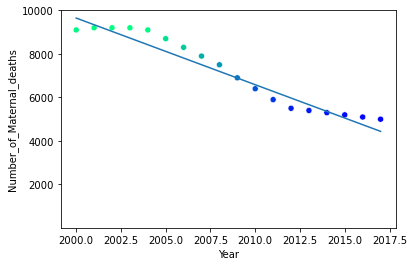

In [215]:
axes=sns.scatterplot(data=MaternalDeaths, x='Year',y='Number_of_Maternal_deaths',hue='Number_of_Maternal_deaths',palette='winter',legend=False)
axes.set_ylim(10,10000)#limit distribution
x=np.array( [min(MaternalDeaths.Year.values),max(MaternalDeaths.Year.values)])
y=predict (x)
import matplotlib.pyplot as plt
line=plt.plot (x,y)

From the results we can see that the number of maternal deaths are decreasing over time.

## TOTAL NUMBER OF MATERNAL DEATHS IN NAKURU

In [216]:
MaternalDeathsNakuru=pd.read_csv('Monthly_maternal_health_care_statistics_for_Nakuru_county_2012_2016.csv')

In [217]:
MaternalDeathsNakuru.head()

,OBJECTID,No of Maternal Deaths,Date
0,3.0,3.0,01-Jan-12
1,8.0,2.0,01-Feb-12
2,13.0,2.0,01-Mar-12
3,18.0,4.0,01-Apr-12
4,23.0,3.0,01-May-12


In [218]:
MaternalDeathsNakuru.tail()

,OBJECTID,No of Maternal Deaths,Date
53,268.0,4.0,01-Jun-16
54,273.0,1.0,01-Jul-16
55,278.0,2.0,01-Aug-16
56,283.0,2.0,01-Sep-16
57,NaN,162.0,NaN


In [219]:
MaternalDeathsNakuru.columns=('ObjectID','Number_of_maternal_deaths','Date')

In [220]:
MaternalDeathsNakuru.head()

,ObjectID,Number_of_maternal_deaths,Date
0,3.0,3.0,01-Jan-12
1,8.0,2.0,01-Feb-12
2,13.0,2.0,01-Mar-12
3,18.0,4.0,01-Apr-12
4,23.0,3.0,01-May-12


In [221]:
MaternalDeathsNakuru

,ObjectID,Number_of_maternal_deaths,Date
0,3.0,3.0,01-Jan-12
1,8.0,2.0,01-Feb-12
2,13.0,2.0,01-Mar-12
3,18.0,4.0,01-Apr-12
4,23.0,3.0,01-May-12
5,28.0,5.0,01-Jun-12
6,33.0,7.0,01-Jul-12
7,38.0,3.0,01-Aug-12
8,43.0,3.0,01-Sep-12
9,48.0,3.0,01-Oct-12


In [222]:
from numpy import nan

In [223]:
Nakuru=pd.DataFrame(MaternalDeathsNakuru,columns=['ObjectID','Number_of_maternal_deaths','Date'])
Nakuru=Nakuru.dropna()
Nakuru=Nakuru.reset_index(drop=True)                                             

In [224]:
Nakuru

,ObjectID,Number_of_maternal_deaths,Date
0,3.0,3.0,01-Jan-12
1,8.0,2.0,01-Feb-12
2,13.0,2.0,01-Mar-12
3,18.0,4.0,01-Apr-12
4,23.0,3.0,01-May-12
5,28.0,5.0,01-Jun-12
6,33.0,7.0,01-Jul-12
7,38.0,3.0,01-Aug-12
8,43.0,3.0,01-Sep-12
9,48.0,3.0,01-Oct-12


In [225]:
Nakuru['Date']=pd.to_datetime(Nakuru['Date'])
Nakuru['Date']=Nakuru['Date'].dt.year

# # Splitting the data for training and testing
- 80/20 80 training(Number_of_maternal_deaths= b0 +b1Date) and 20 testing

In [226]:
#Series- 1 dimensional and DataFrame = in pandas -reshape(-1,1)
type(Nakuru.Date.values)

numpy.ndarray

In [227]:
Nakuru.Date.values.shape

(57,)

In [228]:
Nakuru.Date.values.ndim

1

In [229]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(Nakuru.Date.values.reshape(-1,1), Nakuru.Number_of_maternal_deaths.values, random_state=11)

In [230]:
X_train.shape

(42, 1)

In [231]:
X_test.shape

(15, 1)

In [232]:
y_train.shape

(42,)

In [233]:
x_test.shape

(5, 1)

In [234]:
y_test.shape

(15,)

In [235]:
#percentage training
42/(42+15)*100

73.68421052631578

In [236]:
#training the model
from sklearn.linear_model import LinearRegression

In [237]:
linear_regression=LinearRegression()

In [238]:
linear_regression

LinearRegression()

In [239]:
linear_regression.fit(X_train, y_train)

LinearRegression()

Number_of_maternal_deaths$=b_0 + Dateb_1$

In [240]:
linear_regression.coef_

array([-0.0342131])

In [241]:
linear_regression.intercept_

72.06451612903227

$Number_of_maternal_deaths=72.06451612903227+-0.0342131Date

In [242]:
#Substitute Date to get Number of maternal deaths
4.46717577237607+-9.32441971e-19* 2027-2-1

1.467175772376068

In [243]:
#Testing the model

In [244]:
predicted= linear_regression.predict(X_test)

In [245]:
for p_, p in zip(predicted, y_test):
    print(f"Predicted: ", p_, "Actual: ", p)

Predicted:  3.1251221896383186 Actual:  5.0
Predicted:  3.193548387096783 Actual:  2.0
Predicted:  3.1251221896383186 Actual:  1.0
Predicted:  3.1251221896383186 Actual:  5.0
Predicted:  3.193548387096783 Actual:  3.0
Predicted:  3.1251221896383186 Actual:  4.0
Predicted:  3.227761485826008 Actual:  3.0
Predicted:  3.1251221896383186 Actual:  8.0
Predicted:  3.227761485826008 Actual:  2.0
Predicted:  3.1251221896383186 Actual:  2.0
Predicted:  3.0909090909090935 Actual:  3.0
Predicted:  3.227761485826008 Actual:  5.0
Predicted:  3.0909090909090935 Actual:  6.0
Predicted:  3.193548387096783 Actual:  4.0
Predicted:  3.0909090909090935 Actual:  2.0


In [246]:
#Model evaluation
#calculatinf RMSE
import numpy as np
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, predicted))
print("Root Mean Squared Error: ", rmse)

Root Mean Squared Error:  1.894128921869972


### Visualization of the data

In [247]:
import seaborn as sns

In [248]:
import numpy as np

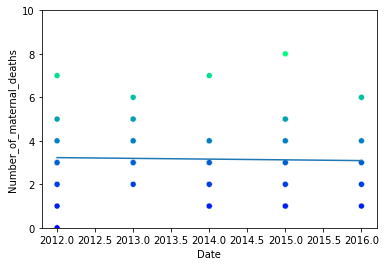

In [249]:
axes=sns.scatterplot(data=Nakuru, x='Date',y='Number_of_maternal_deaths',hue='Number_of_maternal_deaths',palette='winter',legend=False)
axes.set_ylim(0,10)#limit distribution
x=np.array( [min(Nakuru.Date.values),max(Nakuru.Date.values)])
y=predict (x)
import matplotlib.pyplot as plt
line=plt.plot (x,y)

### Results
From the results we can see that currently as Kenya we are doing well in terms of reducing maternal deaths.Some of the interventions currently in place are
- Free maternal Health policy since 2013
- Encouraging women to give birth at the hospital rather than at home
- Working with community health workers to identify preganant women in the community and sending them to hospital
In Nakuru the number of maternal deaths was fairly constant with no noticeable drop as expected, regardless of the years. This was mostly attributed to the fact that.
- In Nakuru awareness of maternal health systems initiatives, emergency obstetric care (EmOC) and free maternity services (FMS) by mothers is fairly low. If good services are available but no one knows about it, the implementation is a failure. There is need for widespread education on these services to both men and women in the county

### Conclusions
Although Kenya as a whole still needs to work on the rate of maternal deaths we are on the right track based on future predictions.There is need to strengthen and educate the public on existing services.This would go a long way to prevent future maternal deaths.Due to our cultural dynamics it is also importnat to include men in these education forums

### References
WHO, UNICEF, UNFPA, World Bank Group, and the United Nations Population Division (2000 to 2017). Number of maternal Deaths-Kenya. Retrieved from https://data.worldbank.org/indicator/SH.MMR.DTHS?locations=KE&name_desc=true

(2012-2016) Data on the number of women seeking maternal health care on monthly basis for Nakuru county. Retrieved from https://www.opendata.go.ke/datasets/monthly-maternal-health-care-statistics-for-nakuru-county-2012-2016/explore

Kingori, W & Okero,D & Mwangi, E. (2019). Uptake of maternal health systems initiatives among mothers in Nakuru County, Kenya.

Dunn, A.Haque, S.Innes, M.(2011) Rural Kenyan men's awareness of danger signs of obstretic complications Retrieved from 
https://europepmc.org/article/MED/22187621
